Material of Language Week 2 Assignment

by [Yuguang Zhang](https://www.ygzhang.com/).

I am very interested in the way how Allison made visual patterns by assigning sin wave values to text and emojis [(link here)](https://github.com/aparrish/material-of-language/blob/master/letters-as-numbers.ipynb), and the idea of turning peoms in to images. Since the length of each English word is different, the way of transformation is to turn text into bytes, and turn bytes into RGB values. 

And this has reminded me of the difference in the visual quality between Chinese and English characters, which is something I noticed during Week 1's reading. Chinese characters have a fixed length and they are rectangular. So do Chinese words. Unlike English ones, I feel that they can somehow be used directly as pixels (since each character is a "block"). 

Thus, for this week, my goal is to create monochrome images using Chinese characters.


In order to do that, I will first need a list of Chinese characters representing pixels of different brightness in a monochrome image. Characters with the least number of strokes, such as "一" (which means one), can be used as the brightest pixel. And the ones with the most strokes, such as "龘" (which means a flying dragon), can be used as the darkest.

Based on this idea, I found a snippet of code that loads Chinese characters as a dictonary and sort them in stroke order, as shown below:

In [2]:
dic_bh = dict()
f_bh = open('bh.txt',"r",encoding="UTF-8")
content_bh = f_bh.read()
lines_bh = content_bh.split('\n')
n=len(lines_bh)
for i in range(0,n-1):
    word_bh, mean_bh = lines_bh[i].split('\t', 1)
    dic_bh[word_bh]=mean_bh
f_bh.close()

Check if the dict is loaded correctly.

In [3]:
next(iter(dic_bh))

'一'

Turn the dict into list so that it can be used for mapping.

In [4]:
list_bh = [ [k,v] for k, v in dic_bh.items() ]

In [5]:
list_bh[1]

['丨', '2']

Here I referenced a block of code that provides simply range mapping funtionality in python:
https://stackoverflow.com/questions/1969240/mapping-a-range-of-values-to-another

In [185]:
def mapFromTo(x,a,b,c,d):
   y=(x-a)/(b-a)*(d-c)+c
   return y

In [7]:
len(list_bh)

20902

Then "extract" 256 characters from the comprehensive character list, save them to a new list, and arrange them in an order where the "darkest" character is the first, and the "brightest" one is the last.

In [42]:
list_index = []
for i in range(0, 256):
    list_index.append(round(mapFromTo(i, 255, 0, 0, len(list_bh)-1)))

In [43]:
list_charpix = [ list_bh[item][0] for item in list_index ]

In [44]:
list_charpix

['龘',
 '黷',
 '顲',
 '灝',
 '贜',
 '灡',
 '籞',
 '驜',
 '鱆',
 '邏',
 '蘾',
 '爙',
 '饖',
 '罍',
 '櫻',
 '孀',
 '議',
 '饒',
 '籇',
 '鶗',
 '蘫',
 '繮',
 '爊',
 '蟹',
 '鏡',
 '籈',
 '蹸',
 '礙',
 '蘓',
 '鬋',
 '襙',
 '麏',
 '鯓',
 '鎼',
 '馧',
 '蹘',
 '燹',
 '櫃',
 '嚞',
 '嚮',
 '懧',
 '蟞',
 '顈',
 '餽',
 '鍼',
 '簁',
 '覬',
 '曑',
 '磴',
 '橿',
 '擯',
 '璱',
 '鴖',
 '澺',
 '燵',
 '穈',
 '鮈',
 '餦',
 '錂',
 '篦',
 '嶰',
 '蹄',
 '餐',
 '醙',
 '橅',
 '薨',
 '擂',
 '締',
 '漿',
 '憫',
 '澑',
 '廢',
 '諑',
 '膠',
 '鋛',
 '儍',
 '稹',
 '噌',
 '畾',
 '瞓',
 '碿',
 '輢',
 '蕟',
 '聪',
 '撐',
 '璇',
 '缩',
 '屢',
 '慷',
 '潩',
 '鄰',
 '槀',
 '銞',
 '鉵',
 '僚',
 '稬',
 '敱',
 '蝀',
 '賒',
 '磈',
 '榨',
 '蔒',
 '蓻',
 '塿',
 '熬',
 '缜',
 '谪',
 '愱',
 '溭',
 '煵',
 '廓',
 '麁',
 '腢',
 '鈼',
 '傹',
 '稕',
 '嵧',
 '蜊',
 '閙',
 '虜',
 '碤',
 '楟',
 '嗭',
 '靲',
 '搋',
 '魂',
 '絧',
 '媇',
 '谢',
 '愡',
 '渢',
 '勞',
 '竦',
 '詛',
 '腴',
 '鈉',
 '焦',
 '税',
 '铽',
 '剴',
 '蛛',
 '晿',
 '悲',
 '厨',
 '棓',
 '葤',
 '萫',
 '握',
 '蛓',
 '琔',
 '缁',
 '婩',
 '谞',
 '営',
 '液',
 '盓',
 '旍',
 '訨',
 '脵',
 '盘',
 '偎',
 '秳',
 '崡',
 '啥',
 '晜',
 '雀',
 '硐'

In [45]:
str_charpix = ''.join(list_charpix)

In [46]:
len(str_charpix)

256

Then I made a simple test to load an small-size image, turn it into grayscale, then replace every pixel in the image with a character with corresponding "brightness".

In [187]:
width = 128
height = 128
img_to_load = 'cat.jpg'

In [188]:
from PIL import Image

In [189]:
im = Image.open(img_to_load)
im_bw = im.convert('L')
px = im_bw.load()
print(px[20,20])

33


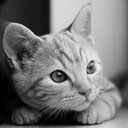

In [190]:
im_bw

In [191]:
list_im_char = []
for i in range(height): #height
    for j in range(width): #width
        list_im_char.append(list_charpix[px[j,i]])        

In [192]:
len(list_im_char)

16384

Then join the output text, and wrap and print it to see if it works or not.

In [193]:
str_im = ''.join(list_im_char)

In [194]:
import textwrap

In [195]:
print(textwrap.fill(str_im, width))

籞黷黷籞饖籇蘓櫃蟞顈餽鍼餽蟞嚮嚞嚞燹蹘馧馧鎼鯓襙蘓礙籈籈蹸蹸籈蟹籈蹸礙礙礙籈蟹繮蘫鶗饒孀孀議鶗蘫籈餐腢谞勍洽荓衱侅庞炉炉庞庞炉衱岟侅炉衱怙怙衱衱炉怙衱卺衱卺挞荓衱柇哏咦荓垠砒咦哏垠乗洽哏疮艳乗洽洽宣宣洽洽屍姳莟砝剔唑唑秮釘玺屖珼埮菰雀啥盘旍盓婩棓铽渢虜溭榨
顲黷灝爙籇蟹麏嚞鍼簁覬覬覬鍼顈蟞嚮嚞燹蹘蹘馧鎼麏鯓襙鬋鬋襙襙蘓礙籈蹸蹸礙蹸籈鏡蟹繮鶗饒孀孀饒籇蘫籈餐腢谞勍洽荓衱肢庞炉炉庞庞炉怙侅庞怙衱怙炉炉怙怙衱卺卺衱卺挞荓览荓卺卺荓咦俓俓柇疮桘捗哏咦狿俓炻洽宣洽洽洽屍姳莟桘逌剔唑钲倠玺冧皰堁菰硐啥盘訨旍谞萫蛛詛靲腢缜
黷顲鱆籇蹸麏蹘懧顈餽鍼鍼鍼顈蟞懧蟞嚮櫃燹燹蹘馧鯓麏鬋蘓蘓鬋鬋礙蹸蹸蹸蹸蹸蹸籈籈籈繮鶗籇議議饒籇鶗籈餐腢谞勍洽荓衱庞炉怙炉庞肢庞炉庞怙衱衱怙炉炉炉衱卺驿卺衱卺驿垠垠挞挞垠柇砒览览疮秮倠宣乗哏俓疮炻洽宣洽洽洽屍艳挶桘逌剔剔唑秮釘烫屖珼萐楖晜秳脵営琔棓剴竦靲腢熬
灡鱆孀鏡鯓櫃懧顈顈顈餽餽顈蟞懧嚮蟞嚮櫃燹燹蹘鎼麏鬋蘓礙礙蘓礙蹸籈蹸蹸籈籈籈蹸蹸礙繮蘫籇饒議饒籇鶗籈餐腢谞勍洽荓衱炉怙怙炉庞肢肢庞庞怙衱衱怙炉怙衱卺驿驿驿卺卺驿垠衱挞砒咦砒览洽逌萐偎阅叙炻屍狿疮炻洽洽洽洽洽屍艳捗莟砝逌剔唑秮倠淽冧皰埮菰雀秳盘営琔棓铽勞嗭麁塿
櫻籇鏡鬋蹘蟞鍼鍼覬覬覬覬簁鍼鍼餽蟞嚮櫃燹蹘馧鯓襙鯓襙鬋鬋襙襙蘓礙蹸蹸蹸籈蹸蹸礙礙繮繮鶗籇饒饒籇籇籈餐腢谞勍洽荓衱炉怙怙炉庞肢肢庞肢炉怙怙怙怙卺挞驿驿挞驿卺卺驿垠览垠垠砒俓姳勍雀盘営珼屍屍屍乗俓疮炻洽洽洽宣姳捗捗莟砝逌剔唑秮倠淽冧皰堁菰硐崡盘盘盓琔悲腴搋鈼缜
蟹蘓鯓蹘嚮鍼覬簁覬簁簁鍼鍼餽餽餽蟞嚮櫃燹蹘鎼麏鬋襙鬋蘓蘓蘓蘓礙蹸礙礙礙礙礙蹸蹸蹸爊繮蘫鶗籇籇饒饒籈餐腢谞勍洽荓衱庞炉怙炉庞肢庞炉肢庞炉怙怙衱驿垠卺驿挞驿卺驿挞荓咦挞柇宣剔逌挶挶屍秮釘挶炻哏哏炻疮炻洽洽洽宣姳捗挶桘逌剔剔唑秮釘淽冧皰埮菰雀崡盘盘盓琔悲腴靲腢熬
礙鎼嚞蟞鍼橿橿簁鍼鍼餽顈蟞蟞蟞蟞顈懧嚞櫃燹馧鯓襙鬋蘓礙礙礙礙蹸籈礙礙蘓蘓蘓礙籈鏡爊繮繮蘫鶗籇饒饒籈餐腢谞勍洽荓衱肢庞炉炉庞庞炉怙炉怙怙怙炉怙卺垠卺驿驿驿驿驿垠柇挞柇屍釘倠洽垠衱炉挞宣莟狿咦叙洽狿炻洽洽洽宣姳捗莟桘逌剔唑钲倠玺淽冧珼埮菰雀秳脵旍谞萫蛛詛嗭麁塿
礙蹘顈簁磴鴖擯簁曑曑覬簁鍼鍼鍼鍼鍼顈懧嚞櫃蹘鎼麏鎼鯓麏麏麏麏襙鬋礙蘓鬋鬋蘓礙籈蟹爊爊繮蘫鶗籇饒饒籈餐腢谞勍洽荓衱侅庞炉炉庞庞炉衱衱卺衱怙炉炉衱驿衱卺驿驿驿挞荓砒挞狿钲玺屍垠览挶屍柇疮逌屍狿洽俓狿

Finally, I converted the string to img following examples listed here:
https://stackoverflow.com/questions/17856242/convert-string-to-image-in-python

In [196]:
from PIL import ImageDraw, ImageFont

In [197]:
str_img = Image.new('RGB', (1400, 800), (255, 255, 255))
d = ImageDraw.Draw(str_img)
font1 = ImageFont.truetype('simsun.ttc', 5)
d.text((20, 20), textwrap.fill(str_im, width), spacing=0, fill=(255, 0, 0), font=font1)

In [198]:
str_img.save('pil_text.png')

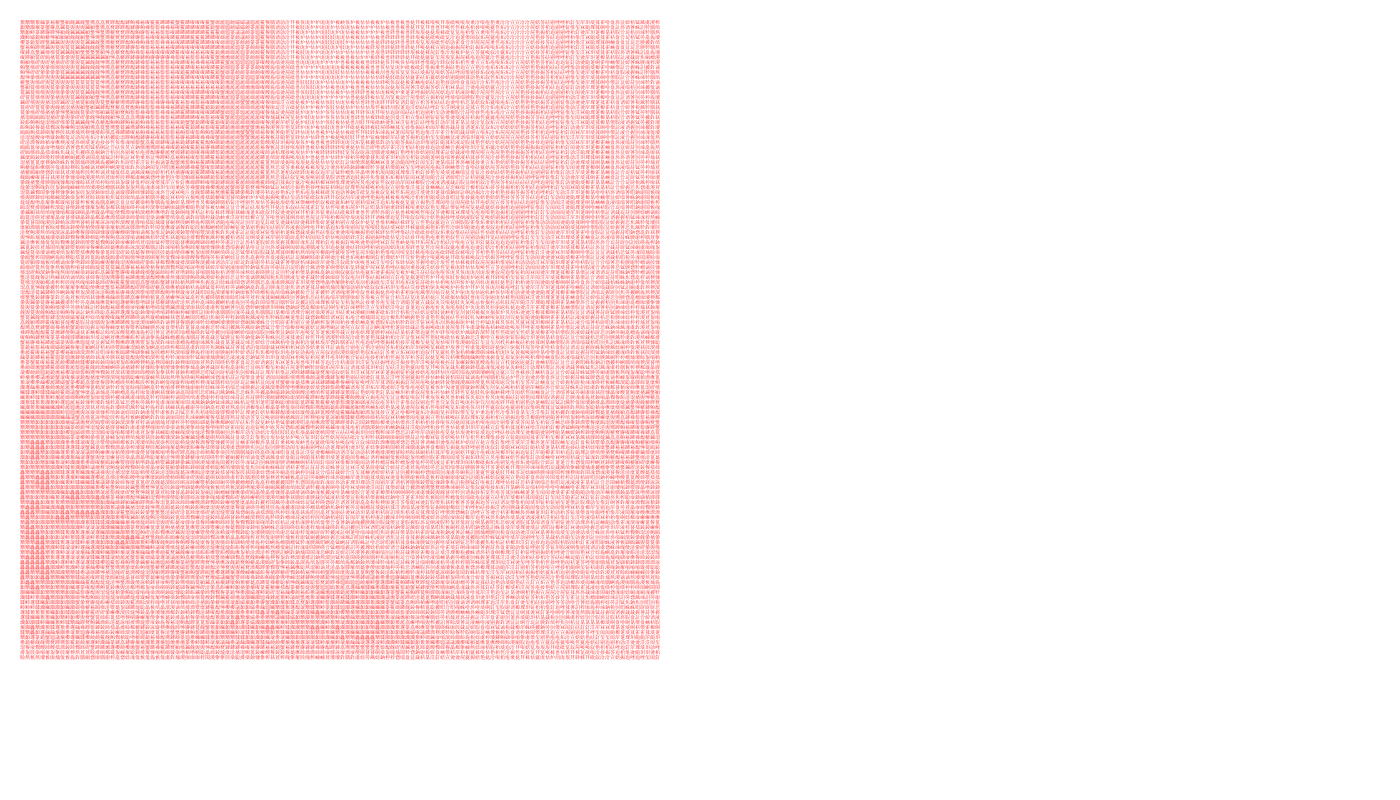

In [199]:
from IPython.display import Image as showimg
showimg(filename="pil_text.png", embed=True)

It worked!

So I eventually apply this idea to frames of a slow-motion cat video, and eventually converted a portion of the video to a "character" video.

In [182]:
def img2str(width, height, img_path):
    im = Image.open(img_path)
    im_bw = im.convert('L')
    px = im_bw.load()
    print(px[20,20])
    list_im_char = []
    for i in range(height): #height
        for j in range(width): #width
            list_im_char.append(list_charpix[px[j,i]])
    txt_str = ''.join(list_im_char)
#     print(textwrap.fill(txt_str, width))
    return txt_str
    
def save_txt_img(txt_str, img_name):
    str_img = Image.new('RGB', (1400, 800), (255, 255, 255))
    d = ImageDraw.Draw(str_img)
    font1 = ImageFont.truetype('simsun.ttc', 5)
    d.text((20, 20), textwrap.fill(txt_str, width), spacing=0, fill=(255, 0, 0), font=font1)
    str_img.save(img_name)

In [184]:
for i in range(380):
    if i < 10:
        path = '../../dataset/week2/frame' + '00' + str(i) + '.jpg'
        frame_txt = img2str(266, 140, path)
        save_txt_img(frame_txt, 'output' + str(i) + '.png')
    elif i < 100:
        path = '../../dataset/week2/frame' + '0' + str(i) + '.jpg'
        frame_txt = img2str(266, 140, path)
        save_txt_img(frame_txt, 'output' + str(i) + '.png')
    else:
        path = '../../dataset/week2/frame' + str(i) + '.jpg'
        frame_txt = img2str(266, 140, path)
        save_txt_img(frame_txt, 'output' + str(i) + '.png')

hi
212
hi
221
hi
222
hi
219
hi
219
hi
214
hi
211
hi
217
hi
213
hi
207
208
209
210
209
210
208
199
72
77
85
86
87
85
78
66
76
73
92
168
143
88
75
113
132
144
166
176
156
136
173
226
242
239
222
195
193
217
223
173
110
93
104
108
110
111
106
94
84
79
80
95
131
163
174
180
175
174
176
174
174
140
139
139
139
139
139
139
138
139
138
138
137
137
135
135
133
132
130
128
124
96
58
64
70
73
76
109
118
114
111
108
44
36
34
28
26
25
23
21
21
22
22
23
22
21
20
1
97
230
251
250
250
249
250
251
251
251
250
228
110
26
0
21
22
22
24
22
22
19
18
18
18
17
16
15
15
14
15
15
14
15
15
15
16
16
16
17
17
18
18
17
18
17
21
36
38
38
38
37
35
35
35
35
39
40
39
38
38
36
35
31
29
28
29
31
30
28
33
48
38
30
30
28
27
28
29
29
31
33
32
31
32
32
47
46
45
44
44
43
46
41
38
41
42
41
41
41
40
40
41
41
41
42
42
42
41
41
41
41
42
42
42
42
44
50
64
80
88
90
92
92
92
94
95
96
96
97
97
97
97
97
97
98
97
97
97
97
97
97
97
96
96
96
96
96
97
96
96
96
96
94
60
41
22
14
34
44
47
39
24
26
27
28
37
41
40
38
65
73
65
46
42
52
62
77

The video can be found here:
https://vimeo.com/390902056